<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/220825_Profit_Prediction_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link and I use it to practice my skills

https://thecleverprogrammer.com/2021/04/29/profit-prediction-with-machine-learning/

https://medium.com/coders-camp/180-data-science-and-machine-learning-projects-with-python-6191bc7b9db9

In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/Startups.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
data.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

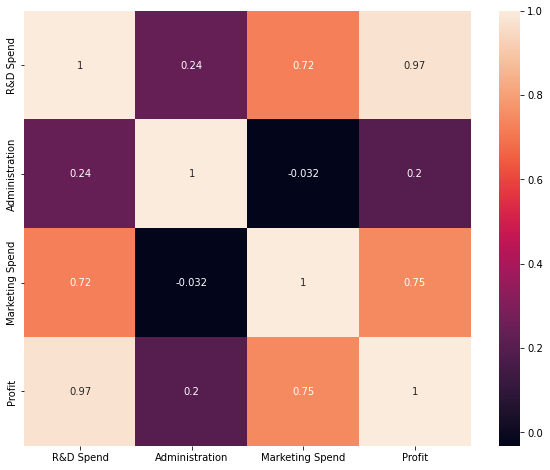

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [11]:
x = np.array(data.drop(['State', 'Profit'], axis=1))
y = np.array(data['Profit'])

In [12]:
y = y.reshape(-1,1)

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((40, 3), (10, 3), (40, 1), (10, 1))

In [15]:
model = LinearRegression()

In [16]:
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

In [18]:
ypred.flatten()

array([ 58734.52403611, 114594.23485772,  68610.56128408, 164295.20961259,
       160065.2119941 ,  66848.97737633, 161842.09103347,  88767.41815746,
       131137.08498488,  97998.03427642])

In [19]:
df = pd.DataFrame(data={'Predicted Profits': ypred.flatten()})
df

,Predicted Profits
0,58734.524036
1,114594.234858
2,68610.561284
3,164295.209613
4,160065.211994
5,66848.977376
6,161842.091033
7,88767.418157
8,131137.084985
9,97998.034276


In [25]:
metrics.r2_score(ytest, ypred)

0.9491604501236232

In [26]:
metrics.mean_absolute_error(ytest,ypred)

6386.401590519557

In [27]:
metrics.mean_absolute_percentage_error(ytest, ypred)

0.0655986093733267